In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


loaded 1 files
loaded 1 files
loaded 1 files
loaded 1 files
loaded 1 files


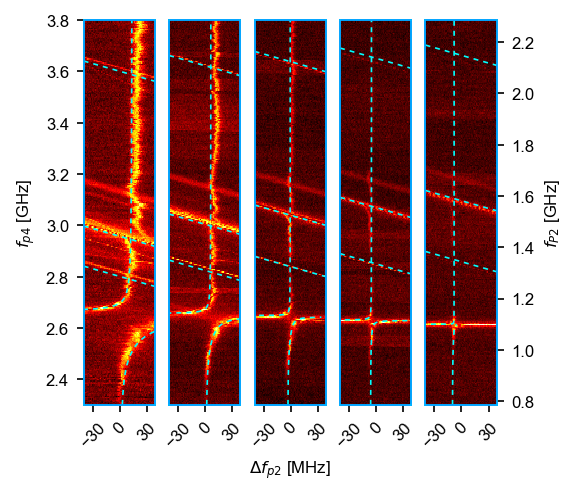

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import pickle
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import sys
import os
from utils.notebook_tools import get_data_from
import pickle

fig_size_single = 3.37
fig_size_double = 6.69

#%% defining style
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.sans-serif']= 'Arial'
plt.rcParams["figure.figsize"] = (fig_size_single, 3)  #it should be 3 
plt.rcParams['figure.dpi'] = 150
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.default'] = 'it' #'regular'

plt.rcParams['legend.frameon']= True
plt.rcParams['legend.fontsize']= 'small'
plt.rcParams['legend.scatterpoints']= 1
plt.rcParams['axes.labelpad'] = 4 #-2

def EP2(f): #frequency in GHz, EP2 in ueV, calculates the electric field of plunger P2, without the lever arm  
    cucc=1.36+7.28*e**(-0.45*f)
    beta=1.231-0.446
    return cucc*beta*1000 

muB=57.883818060*0.241799050402293  #Bohr magneton in GHz 
B=0.675                             #magnetic field in Tesla 
g10=0.17439208                      #g-factor 
c1=-0.00104254                        
d=-0.01145871
a=0.03582596
g20=0.27062489
c2=-0.00142594
aU=a*10**(-3)

def get_fq1(VP1):   #this function calculates the frequency of qubit 1 at different detunings (VP2=-VP1)

    return (muB*B*(g10-c1*VP1)+2*d*1/(1-4*a**2*VP1**2))

def get_fq1b(VP1):  #this function calculates fQ1_ frequency at different detunings (VP2=-VP1)

    return (muB*B*(g10-c1*VP1)-2*d*1/(1-4*a**2*VP1**2))

def get_fq2(VP1):   #this function calculates the frequency of qubit 2 at different detunings (VP2=-VP1)

    return (muB*B*(g20+c2*VP1)+2*d*1/(1-4*a**2*VP1**2))

def get_fq2b(VP1):  #this function calculates fQ2_ frequency at different detunings (VP2=-VP1)

    return (muB*B*(g20+c2*VP1)-2*d*1/(1-4*a**2*VP1**2))

script_dir = os.path.dirname() #<-- absolute dir the script is in

save_path = os.path.join(script_dir, 'Figures')
fig_size_single = 3.37
fig_size_double = 6.69

plt.rcParams['legend.frameon']= False
#plt.rcParams['legend.fontsize']= 'small'
plt.rcParams['legend.scatterpoints']= 1
plt.rcParams['axes.labelpad'] = 4 #-2

#%% load data

detuning_list = [(-11,11), (-10,10), (-9,9), (-8,8), (-7,7)]
start_time_dict = {(-11,11):'2022-07-11\\12-03-11',
                   (-10,10):'2022-07-11\\13-12-41',
                   (-9,9):'2022-07-11\\18-00-58',
                   (-8,8):'2022-07-11\\20-20-02',
                   (-7,7):'2022-07-12\\09-12-02',
                  }

datadir = os.path.join(script_dir, 'measurements')
datfiles_dict = {}
fnames_dict = {}

for detuning in detuning_list:
    start_time = start_time_dict[detuning]
    end_time = start_time #'2021-06-24\\18-03-01' #'2021-06-10\\18-32-47'
    datfiles_dict[detuning], fnames_dict[detuning] = get_data_from(start_time, end_time, num = 1, rootfolder=datadir, only_complete = False) 

#%% Calibrated Rabi frequencies
with open(os.path.join(script_dir, 'measurements\config_freq_rabi.txt'), "rb") as file:
    config_freq_rabi = pickle.load(file)

vP1 = -10
vP2 = 10
P2_pwr = -5
P4_pwr = 3

try:
    fq2p2 = config_freq_rabi['P2'][P2_pwr]['fq2'][(vP1,vP2)]
    fq2 = fq2p2
    fq1p4 = config_freq_rabi['P4'][P4_pwr]['fq1'][(vP1,vP2)]
    fq1 = fq1p4
except:
    print('Could not find calibrated data in database')
    fq1 = 1.51e9
    fq2 = 2.66e9

# mixing_regime = 'difference'
fq = fq1/1e9
#%% Plotting
fig, axs = plt.subplots(1, 5, figsize=(0.95*fig_size_single,0.95*3), sharex=True)
n = 0

VP1=1000*linspace(7,11,5)
VP2=-VP1
Ep2=EP2(1.141)
ratio_avg=t_avg**2/U
aU=0.03583*10**(-3) #1/ueV

def ki3(VP1,ratio):
    return 2*Ep2*2*VP1*ratio*aU**2/(1*(1-aU**2*(2*VP1)**2)**2)
chi3_avg=ki3(VP1,ratio_avg)*1000/4.13566553853809*10**6 #Hz


def chi3_avg_eps(VP1):
    chi3=2*Ep2*2*VP1*t_avg**2*aU**2/(U*(1-aU**2*(2*VP1)**2)**2)
    chi3=chi3*241799.050402293*10**(-6)*10**(9)
    return chi3
#chi3=chi3_avg_eps(11000)

y0s=[2675040111.7585015, 2660330415.3005323, 2650364760.5178795, 2631532967.6893964, 2616048804.3389482]
x0s=[2000000.0, 1500000.0, -3000000.0, -6000000.0, -10000000.0]
chi3s=[21630160.0, 10914770.0, 5669362.0, 5362999.0, 2039367.0]
As=[11847479.048683455, 4907393.14487201, 2605955.8783992277, 942515.3988537926, 1835671.9874591588]
fq1s=[1478719177.586693, 1501973721.8806822, 1519687724.192985, 1534636830.5540218, 1547998214.7768426]

BB=[5.0*10**(-9),5.0*10**(-9),5.0*10**(-9),5.0*10**(-9),5.0*10**(-9)]
fcs=[1.05*10**9,1.05*10**9,1.05*10**9,1.05*10**9,1.05*10**9]
y1ds=[2.667*10**9,2.656*10**9,2.648*10**9,2.6313*10**9,2.6143*10**9]
y1us=[3.8*10**9,3.8*10**9,3.8*10**9,3.8*10**9,3.8*10**9]
y2ds=[2.3*10**9,2.3*10**9,2.3*10**9,2.3*10**9,2.3*10**9]
y2us=[2.63*10**9,2.64*10**9,2.642*10**9,2.629*10**9,2.6122*10**9]

def plotting(x,ax,VP1):          #this function plots resonance lines 
    y1=2*get_fq1(VP1)*10**9-x
    y2=get_fq1(VP1)*10**9+get_fq2(VP1)*10**9/2-x
    y3=get_fq1(VP1)*10**9+get_fq2(VP1)*10**9/2+get_fq1b(VP1)*10**9/2-x
    ax.plot(x*10**(-6),y1*10**(-9),color='cyan',linewidth=0.8,linestyle=(0, (3,3)))
    ax.plot(x*10**(-6),y2*10**(-9),color='cyan',linewidth=0.8,linestyle=(0, (3,3)))
    ax.plot(x*10**(-6),y3*10**(-9),color='cyan',linewidth=0.8,linestyle=(0, (3,3)))
    
b=BB[0]
def x_1(y_u,y0,x0,A,chi3,fq1,fc):
    return (x0*(y_u-y0)+pow(10,0*(y_u-fq1-fc))*(A*(x0+y_u-y0+A*pow(10,0*(y_u-fq1-fc)))-chi3**2))/(y_u-y0+A*10**(0*(y_u-fq1-fc)))

def x_2(y_d,y0,x0,A,chi3,fq1,fc):
    return (x0*(y_d-y0)+pow(10,b*(y_d-fq1-fc))*(A*(x0+y_d-y0+A*pow(10,b*(y_d-fq1-fc)))-chi3**2))/(y_d-y0+A*10**(b*(y_d-fq1-fc)))


for detuning in detuning_list:
    datfile = datfiles_dict[detuning][0]
    
    delta = datfile.delta_set.ndarray[0,:]
    mixing = datfile.mixing_set.ndarray
    fp2 = mixing
    fp4 = abs(fp2 - fq)
    
    axs[n].pcolor(delta/1e6, fp2/1e9, datfile.su0, shading='auto', cmap='hot', zorder=0)
    #print(min(delta/1e6))
    #print(max(delta/1e6))
    axs[n].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs[n].tick_params('x', labelrotation=45) 
    axs[n].set_xticks([-30,0,+30])
    # axs[n].set_title(detuning, fontsize=8)
    for spine in axs[n].spines.values():
        spine.set_edgecolor('blue')
    
    xi=linspace(-40*10**6,39*10**6,5000)
    plotting(xi,axs[n],-11.0+n)
    y1=linspace(y1ds[n],y1us[n],5000)
    y2=linspace(y2ds[n],y2us[n],5000)
    axs[n].plot(x_1(y1,y0s[n],x0s[n],As[n],chi3s[n],fq1s[n],fcs[n])/1e6,y1/1e9,color='cyan',linewidth=0.8,linestyle=(0, (3,3)))
    axs[n].plot(x_2(y2,y0s[n],x0s[n],As[n],chi3s[n],fq1s[n],fcs[n])/1e6,y2/1e9,color='cyan',linewidth=0.8,linestyle=(0, (3,3)))
    axs[n].set_xlim(-40,39)
    axs[n].set_ylim(2.3,3.8)
    
    if n > 0:
         axs[n].set_yticks([])
    
    ax2 = axs[n].twinx()
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    fp2_max, fp2_min = axs[n].get_ylim()
    ax2.set_ylim(fp2_max - fq, fp2_min - fq)
    if n < len(detuning_list)-1:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
    for spine in ax2.spines.values():
        spine.set_edgecolor('deepskyblue')

    n = n + 1
    
axs[0].set_ylabel(r'$f_{p4}$ [GHz]')
axs[2].set_xlabel(r'$\Delta f_{p2}$ [MHz]')
ax2.set_ylabel('$f_{P2}$ [GHz]')

plt.subplots_adjust(left=0.07,
                    bottom=0.05,
                    right=0.93,
                    top=0.95,
                    hspace=0)

plt.show()

fig.savefig('Figure4_overlayed.pdf',format='pdf', dpi=300,bbox_inches="tight")
fig.savefig('Figure4_overlayed.png',format='png',dpi=300,bbox_inches="tight")
fig.savefig('Figure4_overlayed.svg',format='svg',bbox_inches="tight")